# Prepare the Data

In [19]:
# Prepare the Data imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [20]:
whale = pd.read_csv(r'C:\Users\horac\Desktop\fintech\Starter_Code\Resources\whale_returns.csv',index_col='Date', parse_dates=True, infer_datetime_format=True).dropna()
algo = pd.read_csv(r'C:\Users\horac\Desktop\fintech\Starter_Code\Resources\algo_returns.csv',index_col='Date', parse_dates=True, infer_datetime_format=True).dropna()
sp = pd.read_csv(r'C:\Users\horac\Desktop\fintech\Starter_Code\Resources\sp_tsx_history.csv',index_col='Date', parse_dates=True, infer_datetime_format=True).dropna()
sp['Close'] = sp['Close'].str.replace('$', '')
sp['Close'] = sp['Close'].str.replace(',', '').astype(float)
#Read in table, drop na and do data transformation

In [21]:
sp['sp_return']=sp['Close'].pct_change()
sp.dropna()
sp.drop(columns=['Close'], inplace=True)
#calculate sp return

In [22]:
combined = pd.concat([whale, algo, sp] ,join='inner',axis=1)
#join 3 table together 

# Performance Analysis

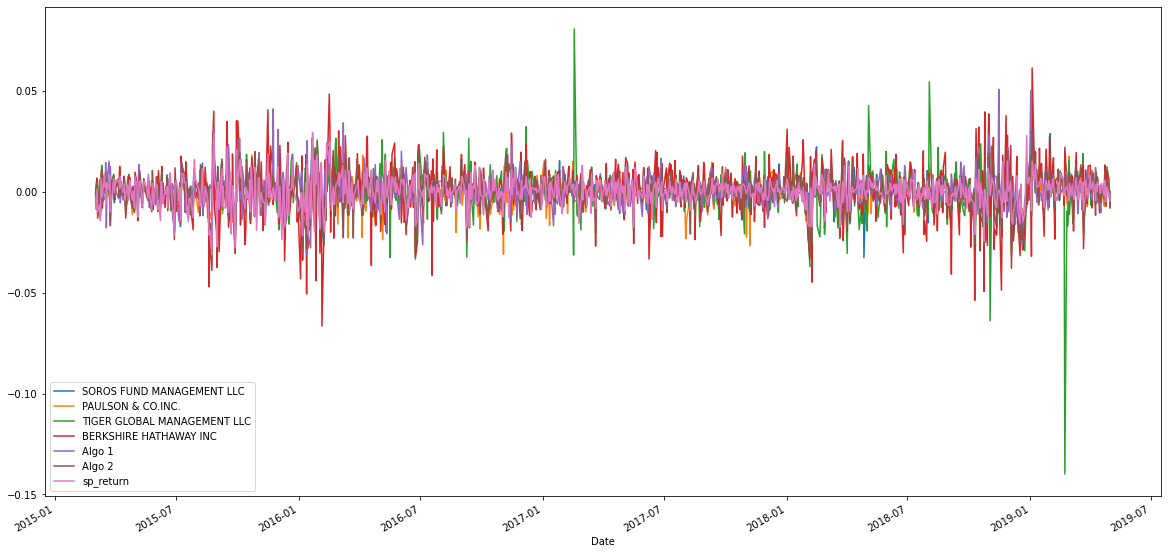

In [23]:
combined.plot(figsize=(20,10)) #plot daily return 

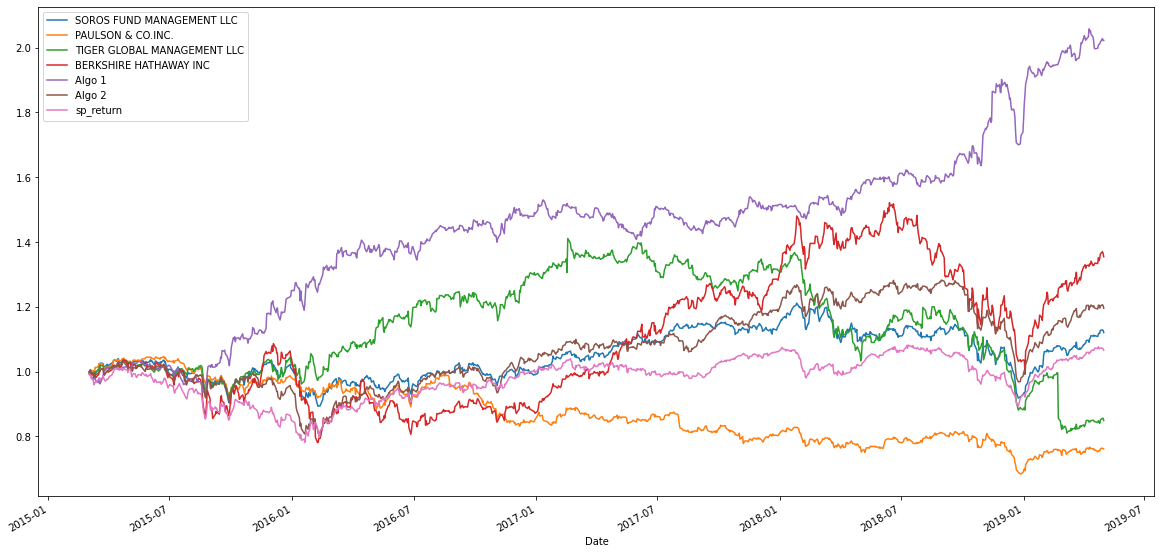

In [24]:
cumultive_returns = (1 + combined).cumprod()
cumultive_returns.plot(figsize=(20,10))
#plot cumulative returns, 4 portfolio performs better than S&P

# Risk Analysis

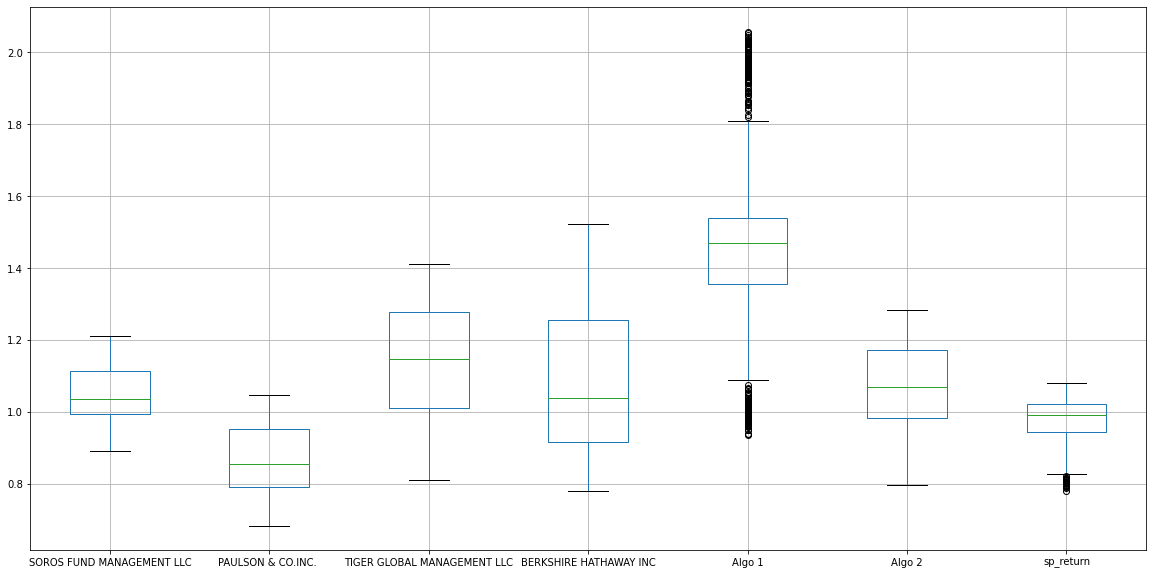

In [25]:
cumultive_returns.boxplot(figsize=(20,10))

In [26]:
crs=cumultive_returns.std() 
crs
#sp is the least risky one

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
sp_return                      0.064354
dtype: float64

In [27]:
annulized_std = crs * np.sqrt(252)
annulized_std

SOROS FUND MANAGEMENT LLC      1.115525
PAULSON & CO.INC.              1.440370
TIGER GLOBAL MANAGEMENT LLC    2.360896
BERKSHIRE HATHAWAY INC         3.125227
Algo 1                         4.108944
Algo 2                         1.851072
sp_return                      1.021582
dtype: float64

# Rolling Statistics

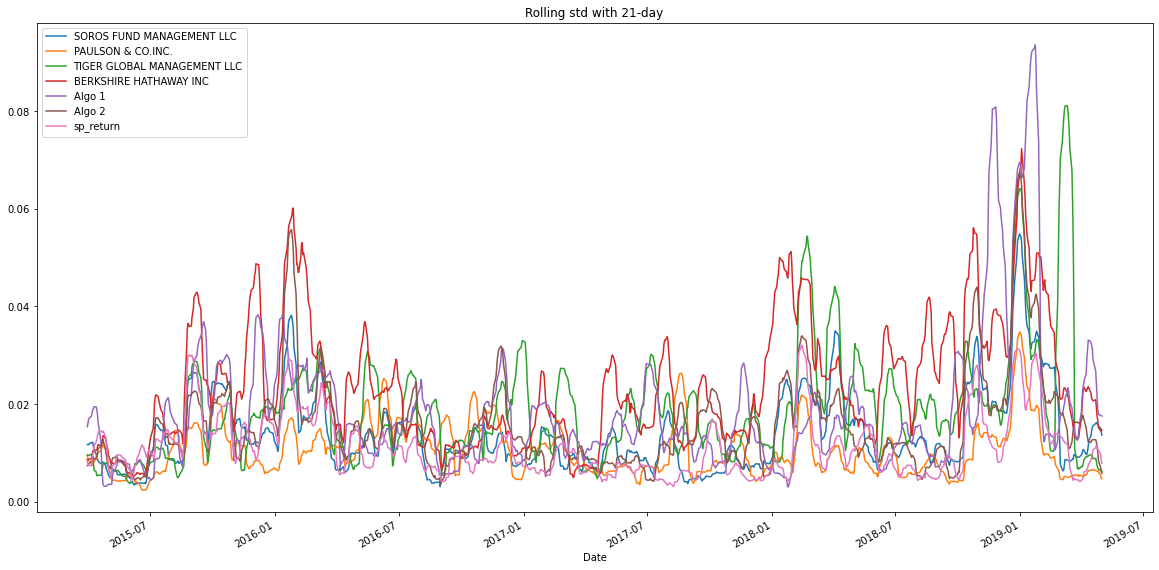

In [28]:
rolling_std = cumultive_returns.rolling(window=21).std()


rolling_std.plot(title='Rolling std with 21-day',figsize=(20,10))

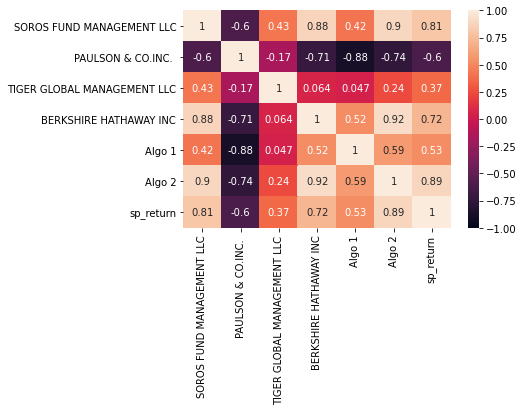

In [29]:
correlation_matrix = cumultive_returns.corr()
sns.heatmap(correlation_matrix,  vmin=-1, vmax=1,annot=True)
#algo 2 mimic S&P TSX 60 the most 

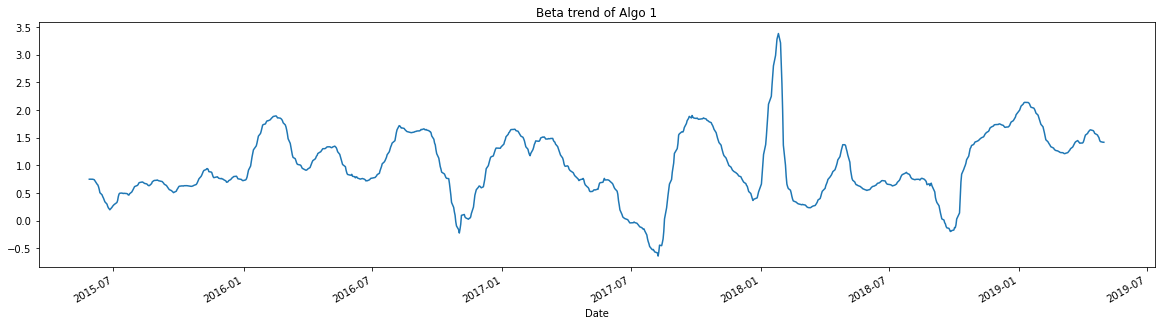

In [30]:
rolling_covariance_algo1 = cumultive_returns['Algo 2'].rolling(window=60).cov(cumultive_returns['sp_return'])

# variance
rolling_variance_SP500 = cumultive_returns['sp_return'].rolling(window=60).var()

# beta
algo1_beta = rolling_covariance_algo1 / rolling_variance_SP500

# plot
algo1_beta.plot(figsize=(20,5), title='Beta trend of Algo 1')

# Sharpe Ratios

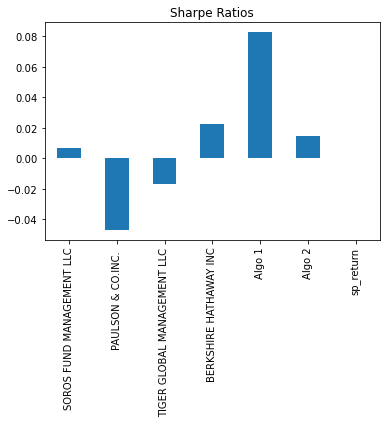

In [36]:
# Sharpe Ratios
sharpe_ratio = (combined.mean() - combined['sp_return'].mean())/(combined.std())
sharpe_ratio.plot(kind='bar',  title="Sharpe Ratios")

# Custom Portfolio

In [48]:
otex = pd.read_csv(r'C:\Users\horac\Desktop\fintech\Starter_Code\Resources\otex_historical.csv',index_col='Date', parse_dates=True, infer_datetime_format=True).dropna()
shop = pd.read_csv(r'C:\Users\horac\Desktop\fintech\Starter_Code\Resources\shop_historical.csv',index_col='Date', parse_dates=True, infer_datetime_format=True).dropna()
l= pd.read_csv(r'C:\Users\horac\Desktop\fintech\Starter_Code\Resources\l_historical.csv',index_col='Date', parse_dates=True, infer_datetime_format=True).dropna()

In [50]:

my_portfolio = pd.concat([otex.Close, shop.Close, l.Close], axis="columns", join="inner") 
my_portfolio.columns = ['otex','shop','l']
my_portfolio.sort_index(inplace=True)
my_portfolio.sort_index(inplace=True)

In [53]:
#  daily returns
daily_returns = my_portfolio.pct_change()
daily_returns.dropna(inplace = True)
daily_returns

,otex,shop,l
Date,,,
2018-01-03,-0.011703,0.023398,-0.010002
2018-01-04,-0.003715,0.017092,0.000174
2018-01-05,-0.007924,-0.001455,0.000000
2018-01-08,-0.009631,0.016392,-0.009753
2018-01-09,-0.000712,-0.011254,0.008969
...,...,...,...
2019-12-20,0.024441,-0.005503,0.003547
2019-12-23,-0.013463,-0.003118,-0.003240
2019-12-24,-0.007773,0.026915,-0.000148


# Weighted returns 

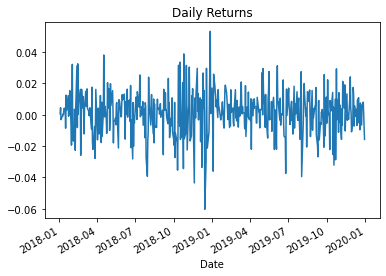

In [55]:
weight = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns  = daily_returns.dot(weight)
my_portfolio_returns.plot(title= 'Daily Returns')

In [56]:
combined['my portfolio'] = my_portfolio_returns
combined.dropna(inplace = True)
combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_return,my portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [57]:
# Annualized Standard Deviation
combined_std = combined.std()
annulized_std = combined_std * np.sqrt(252)
annulized_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
sp_return                      0.099121
my portfolio                   0.224346
dtype: float64

# 21 days rolling window 

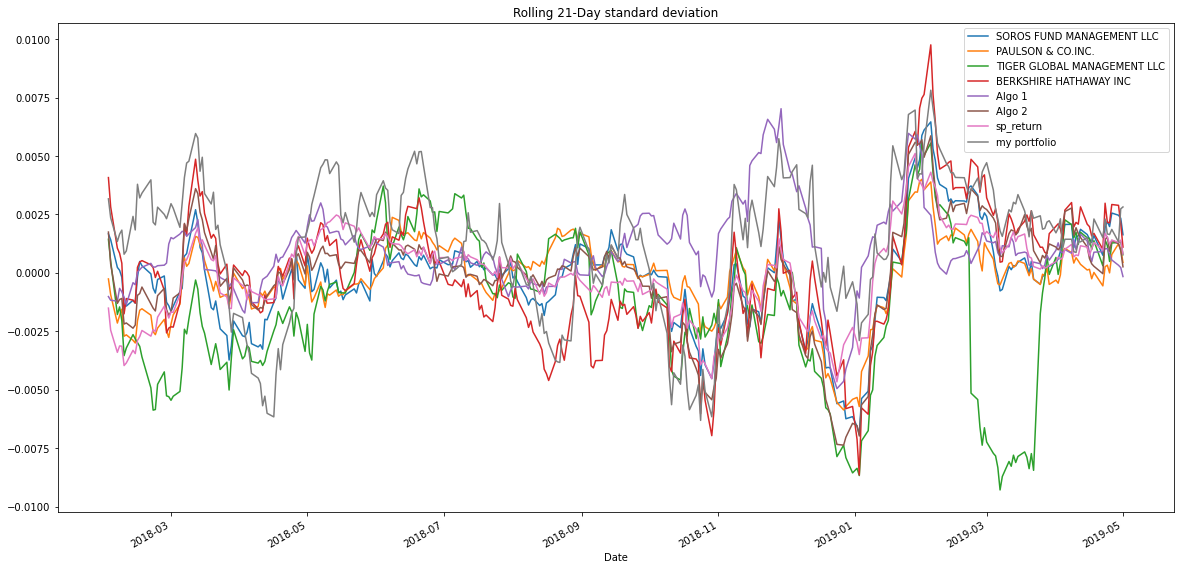

In [59]:
portfolios_rolling_std = combined.rolling(window=21).mean()

portfolios_rolling_std.plot(title='Rolling 21-Day standard deviation',figsize=(20,10))

# correlation

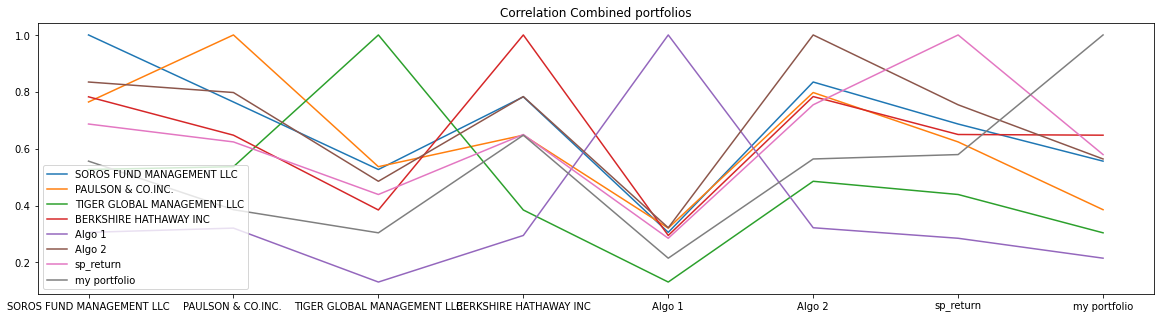

In [62]:
new_correlation = combined.corr()
new_correlation.plot( title='Correlation Combined portfolios',figsize=(20,5))

# Rolling 30-day Beta

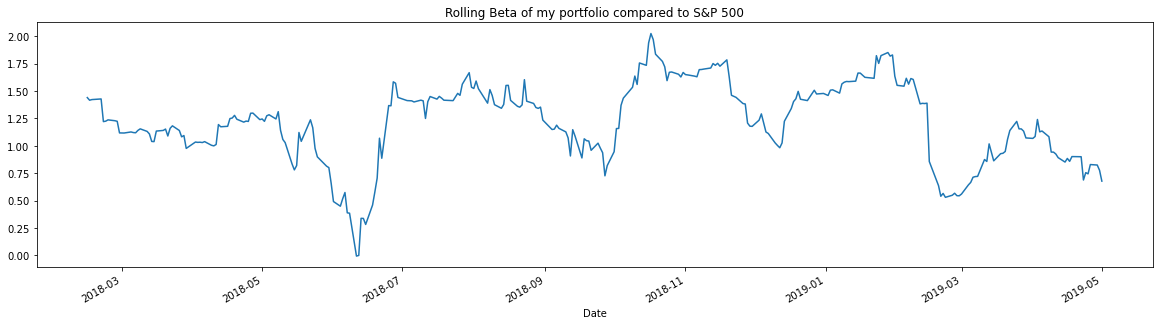

In [66]:
new_covariance = combined['my portfolio'].rolling(window=30).cov(combined['sp_return'])
new_variance = combined['sp_return'].rolling(window=30).var()

combined_rolling_beta = new_covariance / new_variance
combined_rolling_beta.plot(figsize=(20, 5), title='Rolling Beta of my portfolio compared to S&P 500')

# Sharpe ratios

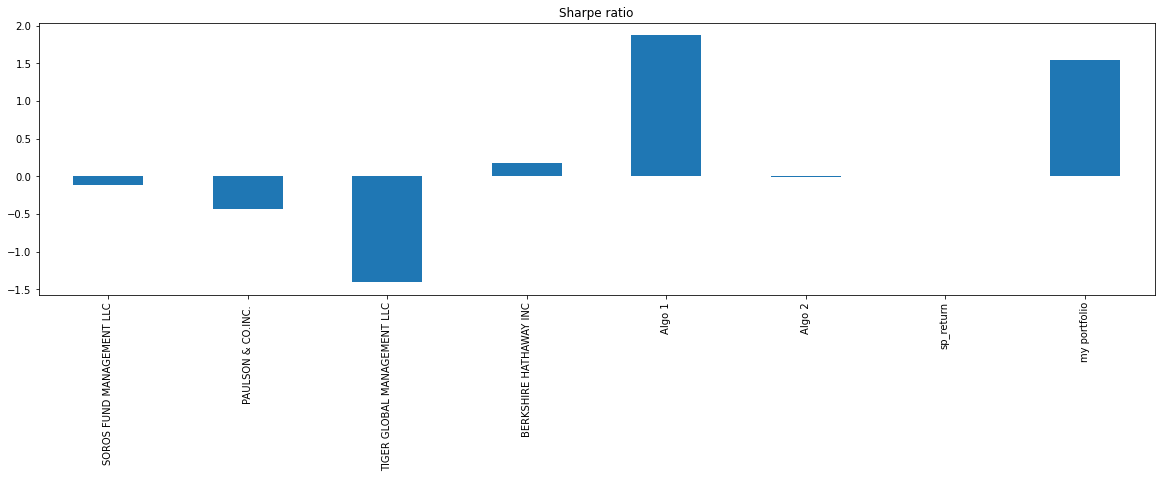

In [67]:
sharpe_ratio = ((combined.mean()-combined['sp_return'].mean()) * 252) / (combined.std() * np.sqrt(252))
sharpe_ratio.plot(kind='bar', title='Sharpe ratio',figsize=(20,5))

#my profolio only underperform algo 1, out performs all other stock 